In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Cargar el archivo ya sin nulos
df = pd.read_csv("df_Valencia_limpio_50cols.csv")
#mostrar valores nulos
df.isnull().sum()


,0
id,0
host_id,0
neighbourhood,0
neighbourhood_cleansed,0
neighbourhood_group_cleansed,0
latitude,0
longitude,0
property_type,0
room_type,0
accommodates,0


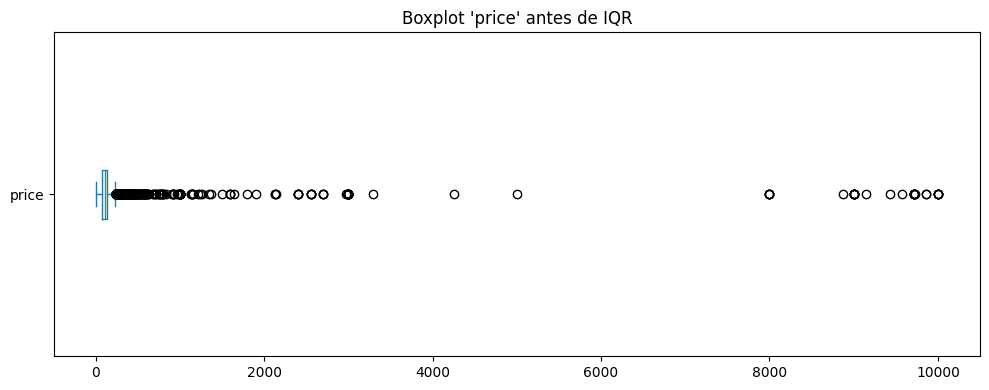

In [40]:
plt.figure(figsize=(10, 4))
df["price"].plot(kind="box", vert=False)
plt.title("Boxplot 'price' antes de IQR")
plt.tight_layout()
plt.show()

In [17]:
#Separar cuantitativas y cualitativas
cuantitativas = df.select_dtypes(include=[np.number])
cualitativas  = df.select_dtypes(exclude=[np.number])

In [18]:
# 3) Método IQR
y = cuantitativas
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


In [22]:

# Mostrar tabla de límites por columna
limites = pd.DataFrame({
    "IQR": IQR,
    "Límite Inferior": limite_inferior,
    "Límite Superior": limite_superior,
    "IQR": IQR,
})
print(" Límites calculados por columna (IQR):")
print(limites)


 Límites calculados por columna (IQR):
                                                       IQR  Límite Inferior  \
id                                            1.248780e+18    -1.873170e+18   
host_id                                       4.346501e+08    -5.851650e+08   
latitude                                      1.338000e-02     3.944172e+01   
longitude                                     3.521000e-02    -4.325950e-01   
accommodates                                  2.000000e+00    -1.000000e+00   
bathrooms                                     0.000000e+00     1.000000e+00   
bedrooms                                      1.000000e+00    -5.000000e-01   
beds                                          2.000000e+00    -2.000000e+00   
price                                         6.500000e+01    -2.550000e+01   
minimum_nights                                4.000000e+00    -5.000000e+00   
maximum_nights                                2.750000e+02    -3.225000e+02   
minimum_minim

In [24]:
# 5) Detectar outliers (se convierten en NaN)
df_outliers_nan = y.copy()
for col in y.columns:
    df_outliers_nan[col] = y[col].where(
        (y[col] >= limite_inferior[col]) & (y[col] <= limite_superior[col]),
        np.nan
    )

In [27]:
# 6) Mostrar cuántos outliers se detectaron por columna
outliers_count = df_outliers_nan.isna().sum()
print(" Total de outliers detectados por columna:")
print(outliers_count)

 Total de outliers detectados por columna:
id                                                 0
host_id                                            0
latitude                                         357
longitude                                         44
accommodates                                     356
bathrooms                                       2379
bedrooms                                         397
beds                                             107
price                                            585
minimum_nights                                   993
maximum_nights                                  2051
minimum_minimum_nights                          1652
maximum_minimum_nights                           972
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                           905
maximum_nights_avg_ntm                             0
availability_30                                    0
ava

In [31]:
# Reemplazar NaN con media (solo de valores válidos)
df_outliers_mean = df_outliers_nan.copy()
df_outliers_mean = df_outliers_mean.fillna(df_outliers_nan.mean().round(1))

In [34]:
#Mostrar si verdadera se limpiaron con mean
outliers_count = df_outliers_mean.isna().sum()
print(" Total de outliers detectados por columna:")
print(outliers_count)

 Total de outliers detectados por columna:
id                                              0
host_id                                         0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availab

In [35]:
# Unir cualitativas + cuantitativas limpias
df_final = pd.concat([cualitativas.reset_index(drop=True),
                      df_outliers_mean.reset_index(drop=True)], axis=1)

In [37]:
# 10) Confirmar número de columnas final
print("Columnas originales:", df.shape[1])
print(" Columnas finales:", df_final.shape[1])

Columnas originales: 53
 Columnas finales: 53


In [42]:
# 11) Guardar archivo final limpio
df_final.to_csv("valencia_IQR_corregido.csv", index=False)

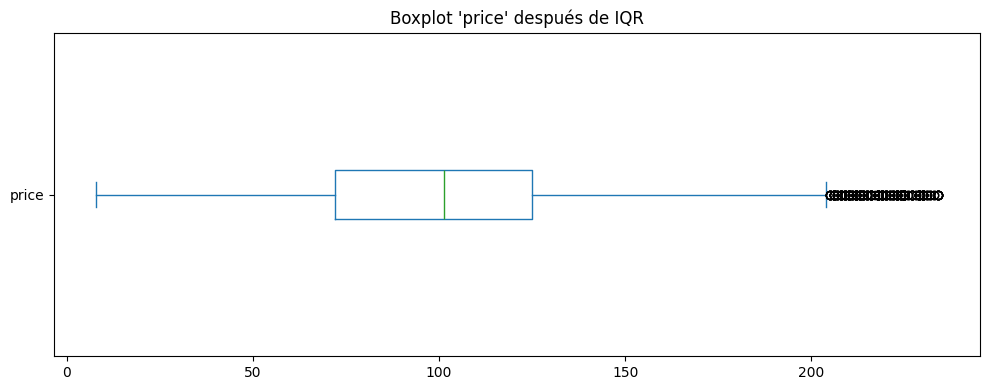

In [41]:
plt.figure(figsize=(10, 4))
df_final["price"].plot(kind="box", vert=False)
plt.title("Boxplot 'price' después de IQR")
plt.tight_layout()
plt.show()
